In [17]:
'''
Trying to figure out if there is a pattern to when stuff crashes.
'''

import subprocess
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

data = []

for i in tqdm(range(2, 100, 2)):
    # print(i, 'prep to run sim', end=' ')
    try:
        s = subprocess.run(['cargo', 'run', '--release', '--', '--particles',
                        str(i), '--no-warnings'], stderr=subprocess.PIPE, stdout=subprocess.DEVNULL, timeout=30)
    except subprocess.TimeoutExpired:
        print(f'timeout at {i}')
        continue
    msg = s.stderr.decode('utf-8')
    # print(len(msg), end=' ')

    match = re.search(r'next_sync_step: ([^\n]+)\n', msg)
    # print('regex done', end=' ')

    if match:
        death_time = float(match.group(1))
        data.append((i, death_time))
        # print(';;;')


particles, death_time = zip(*data)


 67%|██████▋   | 33/49 [01:09<03:04, 11.51s/it]

timeout at 66


100%|██████████| 49/49 [01:34<00:00,  1.93s/it]


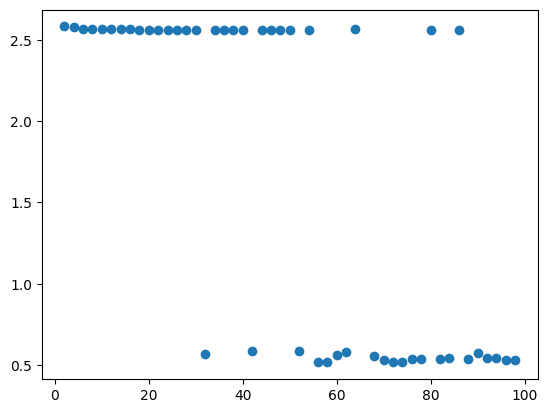

In [19]:
plt.scatter(particles, death_time)
